In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math 

# Auto-Encoder 介紹
Auto-Encoder(自編碼, AE)是一種**非監督式學習的算法**，網路架構主要分為兩個部分**Encoder(編碼器)**和**Decoder(解碼器)**。  
1. Encoder(編碼器): 是負責將影像資訊壓縮到任意維度的低維空間，即**low-dimensional latent space**，低維空間的壓縮資訊簡稱Code。
2. Decoder(解碼器): 是負責將Code解碼回原來的影像。

### Auto-Encoder 訓練機制
Auto-Encoder的訓練目標是希望「輸入到Encoder的影像與Decoder的輸出影像越相似越好」。也是因為整個訓練過程只需要影像資訊，不需任何標籤，因此稱為非監督式學習。  

<img src="img/auto_encoder_1.jpg" width="500" style="float:left">

### Auto-Encoder生成影像
當訓練好Auto-Encoder網路模型後，我們可以隨機產生一組**Code**，並將Code輸入到Decoder中，希望Decoder能夠產生一組與訓練資料類似且有意義的資料。  
<img src="img/auto_encoder_2.jpg" width="500" style="float:left">  

但實際上訓練Auto-Encoder時，並沒有對Encoder產生Code的分布做約束，所以隨機產生的Code透過Decoder產生的圖片，通常不具任何意義。且相似的Code輸出間沒有連續關係。

# Variational Auto-Encoder 介紹
Variational Auto-Encoder(VAE)是Auto-Encoder(AE)的進階版，其架構一樣是由Encoder(編碼器)和Decoder(解碼器)組成。  
不過與**AE**不同的地方在於**VAE**的Encoder，它在訓練後會輸出兩個向量，分別為**平均值(Mean, μ)**和**變異數(Variance, σ^2)**，再由Mean和Variance來產生**常態分佈**，而Decoder的輸入就是從Encoder所產生的常態分佈中隨機抽取一個點作為輸入的Code。
<img src="img/auto_encoder_3.jpg" width="800" style="float:left">  

VAE之所以將Code設計為常態分佈，是為了使輸出間有連續的關係。  
<img src="img/auto_encoder_4.jpg" width="800" style="float:left">  

但實際上，VAE在實作上並不能直接從常態分佈中抽取樣本，因為在BP時，不會有數值。因此我們改成從常態分佈抽取一個**e**，讓Code = exp(σ^2) x e + μ  
<img src="img/auto_encoder_5.jpg" width="800" style="float:left">  

**解釋:**  
μ為原來AE的Code，而這個Code會去加一個**Noise(exp(σ^2) x e)**，希望加上Noise的Code仍然可以Decoder回原圖。  
Noise是從一個標準常態分佈產生的**e**，並乘上一個放大倍率exp(σ^2)。

## Variational Auto-Encoder 生成影像
與 AE 不同，因為輸出間是相關聯的，所以輸出是有意義的。

# Variational Auto-Encoder 損失函數
VAE 的訓練目標是希望預測輸出與影像輸入越相似越好，因此對輸入影像與輸出影像的每一個像素點都做Binary Cross-Entropy(BCE)，這個損失函數又稱為**Reconstruction Loss**。

<img src="img/loss_1.jpg" width="500" style="float:left">  

x: 輸入影像。  
y: 輸出影像。  
W: 影像長度。  
H: 影像高度。  
C: 影像深度。  
N: 一個批次量。

但是只有Reconstruction Loss是不夠的，exp(σ^2)是控制Noise的放大倍率，而σ^2是由網路學習而來的。所以只要網路學會將exp(σ^2)輸出為0，就不會有Noise產生，沒有Noise其結果就相當於AE的輸出結果了。

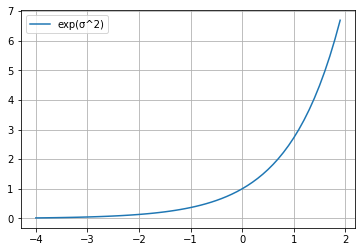

In [39]:
def exponential_func(x, a=2.718):
    y = math.pow(a, x)
    return y
X = np.arange(-4, 2, 0.1)
Y = [exponential_func(x) for x in X]
plt.plot(X, Y, label='exp(σ^2)')
plt.grid(True)
plt.legend(loc='upper left')

因此需要在σ^2加上一個Loss(σ^2)來限制，而如果要使Loss(σ^2)為0的話，σ^2就必須為0，此時Noise的放大倍率exp(σ^2)為1，如此就能解決exp(σ^2)輸出為0的狀況。

<img src="img/loss_2.jpg" width="500" style="float:left">

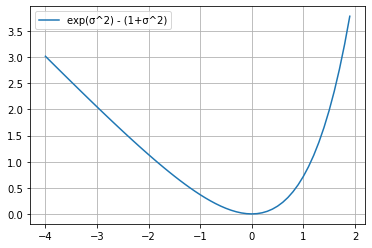

In [38]:
def exponential_func(x, a=2.718):
    w = math.pow(a, x)
    x = (1 + x)
    z = w - x
    return z
X = np.arange(-4, 2, 0.1)
Y = [exponential_func(x) for x in X]
plt.plot(X, Y, label='exp(σ^2) - (1+σ^2)')
plt.grid(True)
plt.legend(loc='upper left')

另外在對μ做L2 regularization，希望μ越小越好。

<img src="img/loss_3.jpg" width="200" style="float:left">

將Loss(σ^2)和Loss(μ)整理在一起，稱為Kullback-Leibler diveragence loss(又稱KL Loss)。

<img src="img/loss_4.jpg" width="500" style="float:left">